In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
import scipy.stats
import arviz
import pymc3

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\users\larry.jones\.virtualenvs\bap2e-wkdg98lc\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [12]:
µ = 0
σ = 1
X = scipy.stats.norm(µ, σ)
x = X.rvs(3)

array([0.08020459, 1.77378608, 1.0191721 ])

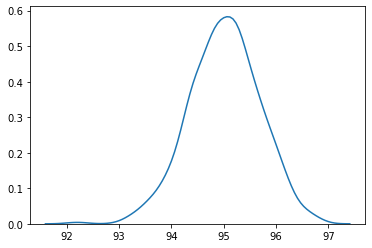

In [22]:
y = []
for t in range(1000):
    x = X.rvs(1000)
    pct = 100 * (len(x[(x > -1.96) & (x < 1.96)]) / len(x))
    y.append(pct)
sns.kdeplot(y)

[]

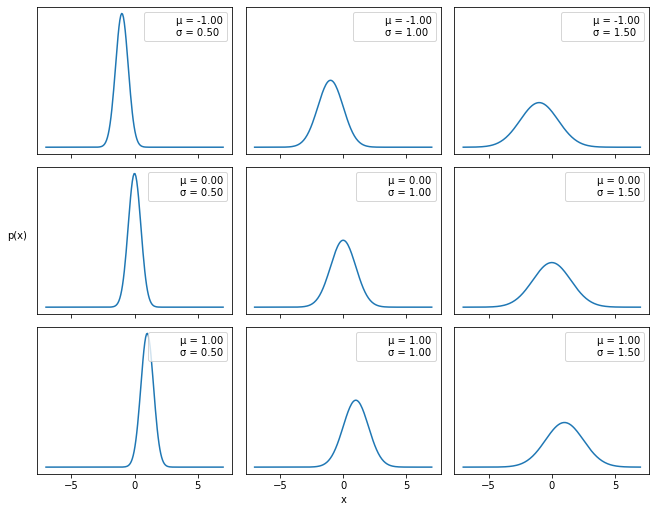

In [34]:
mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]
x = np.linspace(-7, 7, 200)
_, ax = plt.subplots(len(mu_params), len(sd_params), sharex=True, sharey=True, figsize=(9, 7), constrained_layout=True)
for i in range(len(mu_params)):
    for j in range(len(sd_params)):
        mu = mu_params[i]
        sd = sd_params[j]
        y = scipy.stats.norm(mu, sd).pdf(x)
        ax[i, j].plot(x, y)
        ax[i, j].plot([], label=f'µ = {mu:3.2f}\nσ = {sd:3.2f}', alpha=0)
        ax[i, j].legend(loc=1)
ax[2, 1].set_xlabel('x')
ax[1, 0].set_ylabel('p(x)', rotation=0, labelpad=20)
ax[1, 0].set_yticks([])  # no ticks since y-values change depending on parameters